# Logistic Regression with Scikit-learn
## Part One: Exploratory Data Analysis
## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

---
## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

---
## Change the background

In [3]:
mpl.rcParams.update({"figure.facecolor" : "white",
                     "figure.figsize" : [16,11]})

In [2]:
df = pd.read_csv(r"..\Course-2021\DATA\hearing_test.csv")

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [7]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

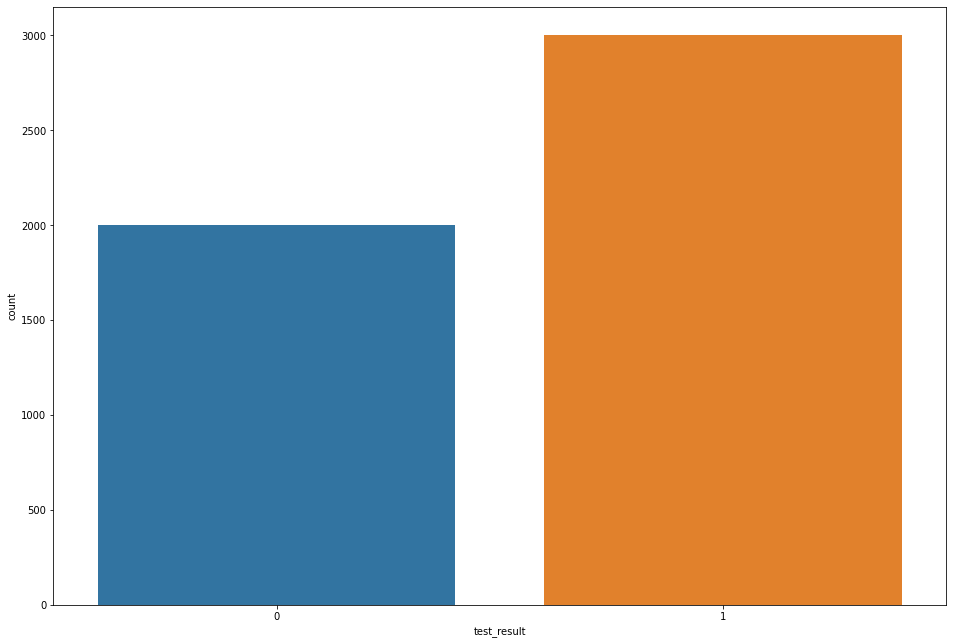

In [8]:
sns.countplot(data=df, x="test_result")

<AxesSubplot:xlabel='test_result', ylabel='age'>

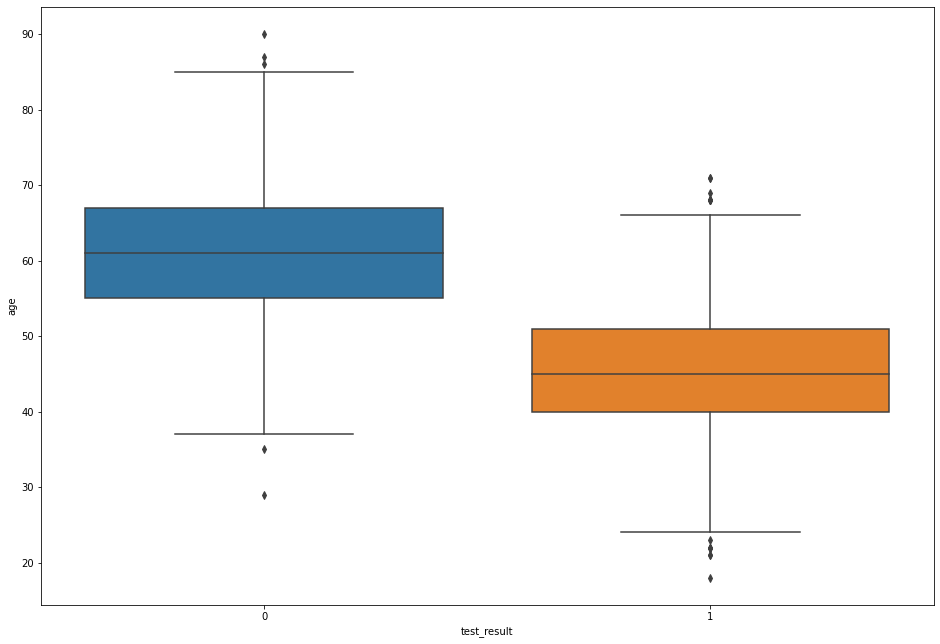

In [9]:
sns.boxplot(x="test_result", y="age", data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

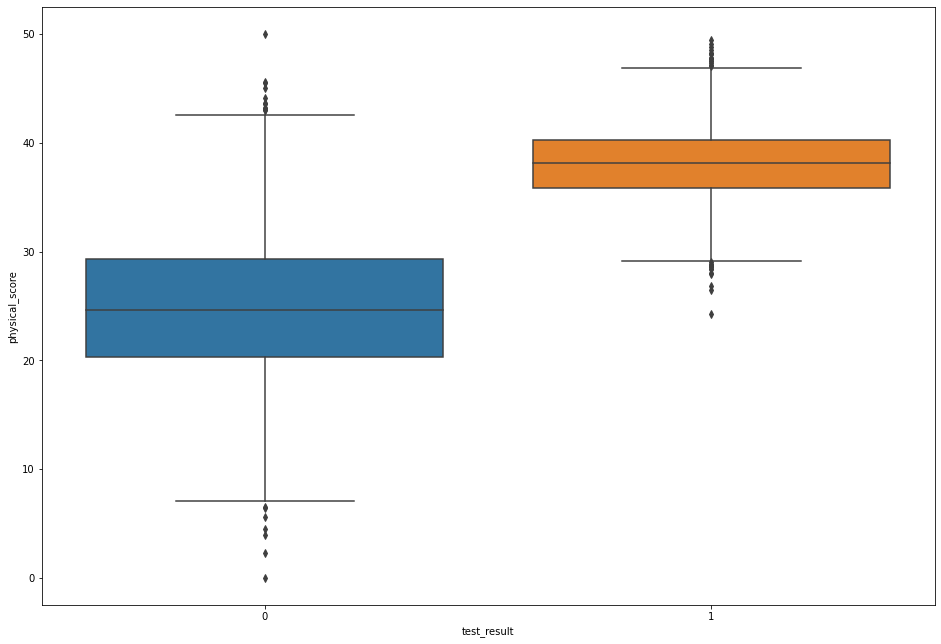

In [10]:
sns.boxplot(x="test_result", y="physical_score", data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

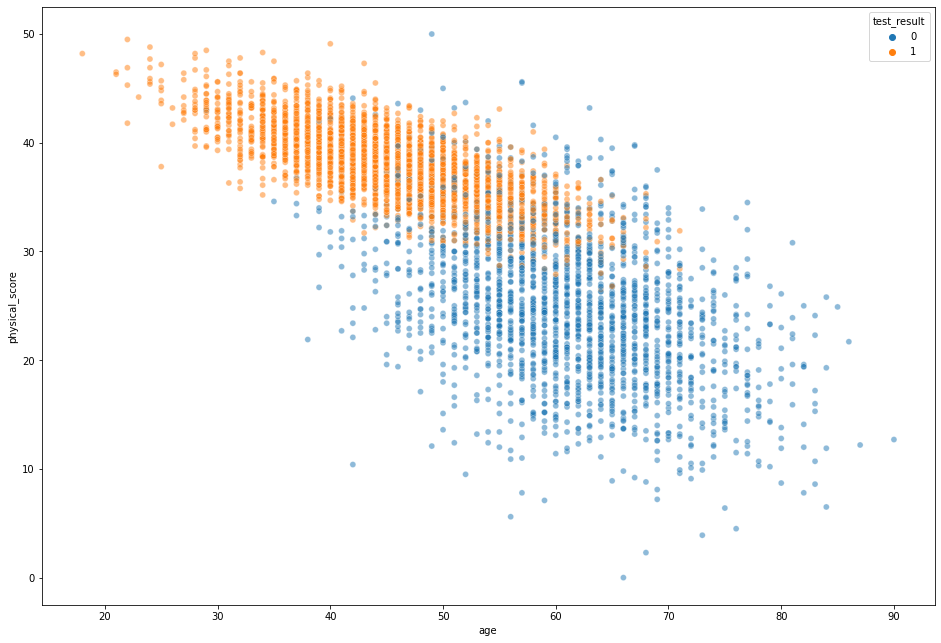

In [11]:
sns.scatterplot(x="age", y="physical_score", data=df, hue="test_result", alpha = 0.5)

* The age increases then the physical score go down
* The young has a high physical score while the old has a low physical score

<Figure size 1440x792 with 0 Axes>

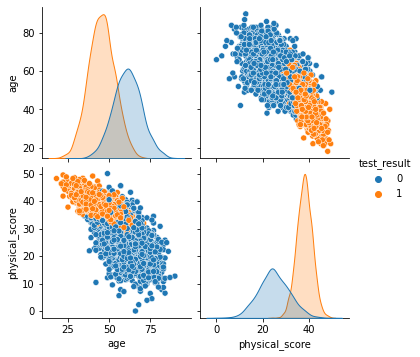

In [12]:
plt.figure(figsize=(20,11))
sns.pairplot(df, hue="test_result")

* `annot` so the number inside the

<AxesSubplot:>

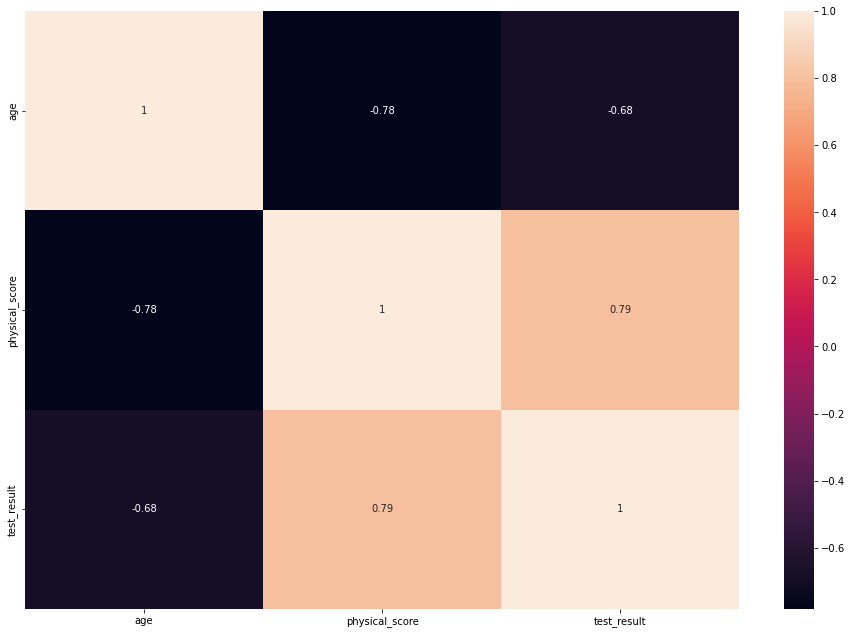

In [13]:
sns.heatmap(data=df.corr(), annot = True)

#### The scatterplot doesn't work to well if one of your axes is going based on the class

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

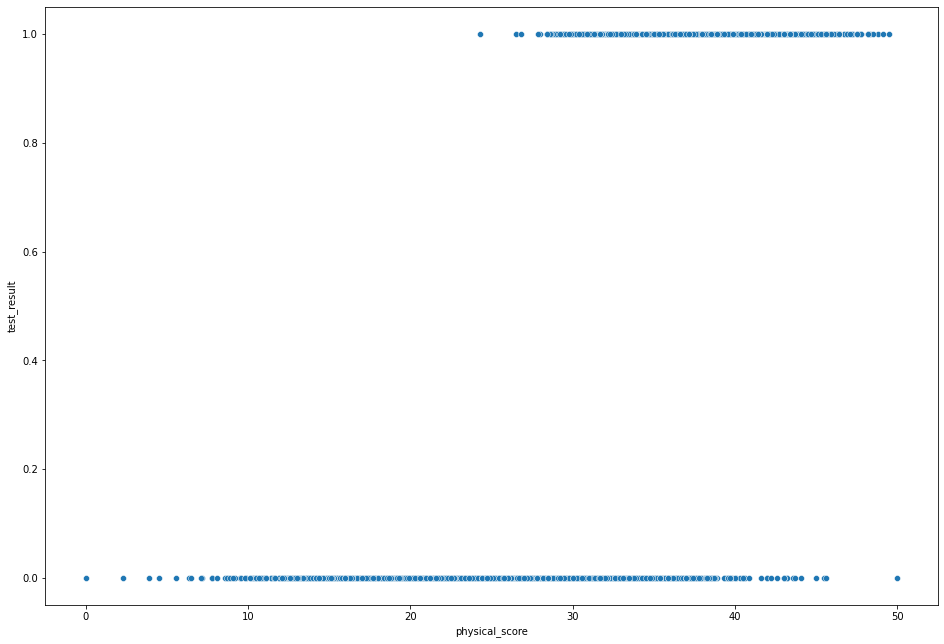

In [14]:
sns.scatterplot(x="physical_score", y="test_result", data=df)

When you have something like this scatter plot => using the boxplot instead

* Plot out the 3D Scatter plot
* 

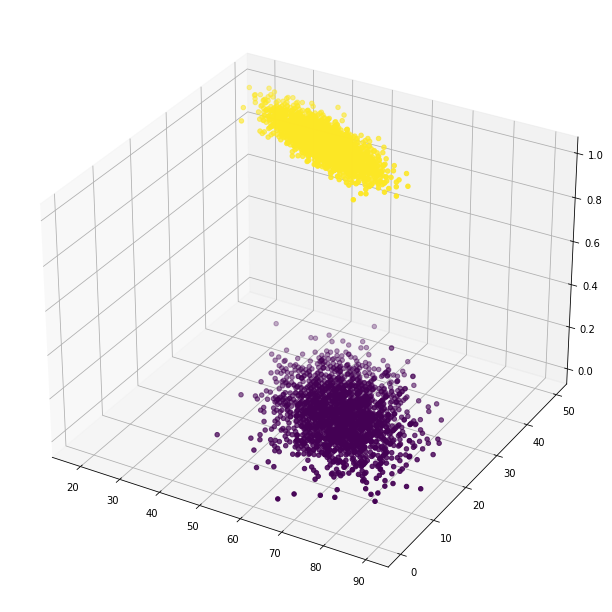

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["age"], df["physical_score"], df["test_result"], c=df["test_result"])

## Part two: Creating and training model

In [18]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [19]:
X = df.drop("test_result", axis=1)

In [20]:
y = df["test_result"]

### Scale the features

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)

In [28]:
scaled_X_test = scaler.transform(X_test)

## Create logistic model

In [29]:
from sklearn.linear_model import LogisticRegression

The `penalty` L1, L2, and elasticnet also available in  logistic regression
The `C` is the inverse of regularization strength => add in a set of value to check in grid search of cross validation to figure out the best `C` value

In [32]:
# help(LogisticRegression)

In [33]:
log_model = LogisticRegression()

In [34]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [35]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [36]:
y_pred = log_model.predict(scaled_X_test)

In [37]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

`log_probability`

In [39]:
y_pred = log_model.predict_proba(scaled_X_test)

In [40]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

# Classification Performance Metrics
## Part one: Confusion Matrix Basics
* You've probably heard of terms such as "false positive" or "false negative". As well as metrics like "accuracy"
* But what do these terms actually mean mathematically?
* Imagine we've developed a test or model to dect presence of a virus infection in a person based on some biological feature
* We could treat this as Logistic Regression, predicting:
    * 0 - Not Infected (test negative)
    * 1 - Infected (tests positive)
* It is unlikely our model will perform perfectly. This means there 4 possible outcomes:
    * Infected person tests positive
    * Healthy person tests negative
        * *Note, these are the outcomes we want! But it is unlikely our test it perfect*
    * Infected person tests negative
    * Healthy person tests positive
* Based off these 4 possibilities, there are many error metrics we can calculate
* First, let's start by visualizing these four possibilities as a matrix
    * Confusion Matrix
        * <img src="https://tek4.vn/public_files/confusion-matrix-png">
    * Imagine a test group of a 100 people
        * 5 are infected. 95 are healthy
        * We tested all of them with these results:
            * INFECTED - INFECTED: 4 (True Positive)
            * INFECTED - HEALTHY: 2 (False Positive)
            * HEALTHY - INFECTED : 1 (False Negative)
            * HEALTHY - HEALTHY: 93 (True Negative)
        * Based on the test => calculate the test error metrics
            * Accuracy
                * How often is the model correct?
                    * Acc = (True Positive + True Negative)/ Total
                    * (4 + 93)/100 = 97% Accuracy
                    * 97 % of people tested accuracy
                * Is this a good value for accuracy?
                * The accuracy paradox come into play
                    * To understand this, we imagine we **always** report back "Healthy"
                        * INFECTED - INFECTED: 0 (True Positive)
                        * INFECTED - HEALTHY: 0 (False Positive)
                        * HEALTHY - INFECTED : 5 (False Negative)
                        * HEALTHY - HEALTHY: 95 (True Negative)
                        * If I ask of how often is the model correct?
                        * 95 % accuracy for a model that always returns "healthy" => this model is always wrong because it's always return healthy regardless of the actual person being tested
                        * You may be thinking, "The numbers here are arbitrary, we just happen to get good accuracy in this made up case. Real world data would reflect poor accuracy if a model always returned the same result"
                        * This is the accuracy paradox!
                            * Any classifier dealing with **imbalanced** classes has to confront the issue of the accuracy paradox
                            * **Imbalanced** classes will always result in a distorted accuracy reflecting better performance than what is truly warranted
                            * **Imbalanced** classes are often found in real world data sets
                                * Medical conditions can affect small portions of the population
                                * Fraud is not common (e.g. Real vs Fraud credit card usage)
                            * If a class is only small percentage (n%) then a classifier that always predicts the majority class will always have an accuracy of (1-n)
                            * In our previous example we saw infected were only 5% of the data
                            * Allowing the accuracy to be 95%
                            * **This means we shouldn't solely rely on accuracy as a metric**
                            * This is where precision, recall, and f1-score will come in
                            * Let's explore these other metrics in the next lecture

## Part Two: Precision and Recall
* We already know how to calculate accuracy and its associated parabox
* Let's explore three more metrics that can help give a clearer picture of performance:
    * Recall (a.k.a sensitivity)
    * Precision
    * F1 - Score
* Let's begin with **Recall**
    * When it actually is a positive case, how of often is it correct
        * (True positive)/Total actual positive
    * INFECTED - INFECTED: 4 (True Positive)
    * INFECTED - HEALTHY: 2 (False Positive)
    * HEALTHY - INFECTED : 1 (False Negative)
    * HEALTHY - HEALTHY: 93 (True Negative)
    * We have 5 people actually infected (INFECTED - INFECTED + HEALTHY - INFECTED) => the Total actual positive = 5
    * We have 4 people correctly identify as infected people
    * => Recall = 4/5 = 0.8
    * How many relevant cases are found? => 80% of time we find relevant case
    * **Relevant case** being that this person is actually infected
    * What's the recall is we always classify as "healthy"?
         * INFECTED - INFECTED: 0 (True Positive)
         * INFECTED - HEALTHY: 0 (False Positive)
         * HEALTHY - INFECTED : 5 (False Negative)
         * HEALTHY - HEALTHY: 95 (True Negative)
         * The recall in this case is: Recall = 0/95 = 0 => alert you to the fact that the model is not catching any relevant cases => the model is completely overfit doing something like reporting everything

    * Now let's explore **precision**
        * When prediction is positive, how often is it correct
        * Precision = (TP)/Total Predicted Positives